In [ ]:
!pip install kaggle

In [ ]:
# configuring the path of Kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

Importing Face Mask Dataset

In [ ]:
# API to fetch the dataset from Kaggle
!kaggle datasets download -d omkargurav/face-mask-dataset

Dataset URL: https://www.kaggle.com/datasets/omkargurav/face-mask-dataset
License(s): unknown
 92% 150M/163M [00:01<00:00, 93.2MB/s]
100% 163M/163M [00:01<00:00, 101MB/s] 


In [ ]:
# extracting the compessed Dataset
from zipfile import ZipFile
dataset = '/content/face-mask-dataset.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [ ]:
!ls

data  face-mask-dataset.zip  kaggle.json  sample_data


**Importing the Dependencies**

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
from sklearn.model_selection import train_test_split

In [ ]:
with_mask_files = os.listdir('/content/data/with_mask')
print(with_mask_files[0:5])
print(with_mask_files[-5:])

['with_mask_311.jpg', 'with_mask_811.jpg', 'with_mask_1414.jpg', 'with_mask_1119.jpg', 'with_mask_1431.jpg']
['with_mask_3209.jpg', 'with_mask_168.jpg', 'with_mask_2664.jpg', 'with_mask_2959.jpg', 'with_mask_2671.jpg']


In [ ]:
without_mask_files = os.listdir('/content/data/without_mask')
print(without_mask_files[0:5])
print(without_mask_files[-5:])

['without_mask_1117.jpg', 'without_mask_631.jpg', 'without_mask_615.jpg', 'without_mask_1141.jpg', 'without_mask_2063.jpg']
['without_mask_2160.jpg', 'without_mask_2794.jpg', 'without_mask_2017.jpg', 'without_mask_2439.jpg', 'without_mask_3337.jpg']


In [ ]:
print('Number of with mask images:', len(with_mask_files))
print('Number of without mask images:', len(without_mask_files))

Number of with mask images: 3725
Number of without mask images: 3828


**Creating Labels for the two class of Images**

with mask  -->  1

without mask  -->  0

In [ ]:
# create the labels

with_mask_labels = [1]*3725

without_mask_labels = [0]*3828

In [ ]:
print(with_mask_labels[0:5])

print(without_mask_labels[0:5])

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


In [ ]:
print(len(with_mask_labels))
print(len(without_mask_labels))

3725
3828


In [ ]:
labels = with_mask_labels + without_mask_labels

print(len(labels))
print(labels[0:5])
print(labels[-5:])

7553
[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


**Displaying the Images**

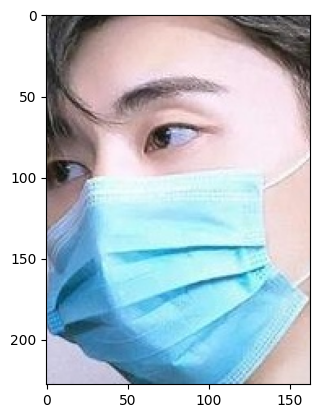

In [ ]:
# displaying with mask image
img = mpimg.imread('/content/data/with_mask/with_mask_1545.jpg')
imgplot = plt.imshow(img)
plt.show()

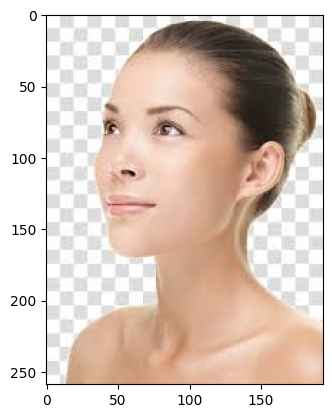

In [ ]:
# displaying without mask image
img = mpimg.imread('/content/data/without_mask/without_mask_2925.jpg')
imgplot = plt.imshow(img)
plt.show()

**Image Processing**

1. Resize the Images

2. Convert the images to numpy arrays

In [ ]:
# convert images to numpy arrays+

with_mask_path = '/content/data/with_mask/'

data = []

for img_file in with_mask_files:

  image = Image.open(with_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)



without_mask_path = '/content/data/without_mask/'


for img_file in without_mask_files:

  image = Image.open(without_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [ ]:
type(data)

list

In [ ]:
len(data)

7553

array([[[158, 115,  80],
        [158, 116,  81],
        [153, 114,  78],
        ...,
        [146, 100,  48],
        [143,  95,  40],
        [134,  84,  31]],

       [[160, 117,  82],
        [159, 117,  82],
        [153, 114,  78],
        ...,
        [142,  97,  46],
        [144,  96,  44],
        [139,  89,  39]],

       [[161, 117,  82],
        [156, 114,  79],
        [151, 112,  75],
        ...,
        [140,  96,  49],
        [142,  94,  45],
        [142,  94,  45]],

       ...,

       [[129, 109,  76],
        [128, 108,  75],
        [127, 106,  73],
        ...,
        [187, 170, 140],
        [145, 120,  90],
        [117,  87,  59]],

       [[129, 109,  76],
        [128, 108,  75],
        [129, 107,  74],
        ...,
        [182, 163, 132],
        [125, 100,  69],
        [110,  81,  53]],

       [[129, 109,  76],
        [127, 107,  74],
        [129, 108,  75],
        ...,
        [176, 157, 126],
        [118,  92,  61],
        [115,  85,  57]]], dtype=uint8)
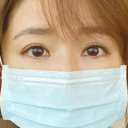

In [ ]:
data[0]

In [ ]:
type(data[0])

numpy.ndarray

In [ ]:
data[0].shape

(128, 128, 3)

In [ ]:
# converting image list and label list to numpy arrays

X = np.array(data)
Y = np.array(labels)

In [ ]:
type(X)

numpy.ndarray

In [ ]:
type(Y)

numpy.ndarray

In [ ]:
print(X.shape)
print(Y.shape)

(7553, 128, 128, 3)
(7553,)


In [ ]:
print(Y)

[1 1 1 ... 0 0 0]


**Train Test Split**

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(7553, 128, 128, 3) (6042, 128, 128, 3) (1511, 128, 128, 3)


In [ ]:
# scaling the data

X_train_scaled = X_train/255

X_test_scaled = X_test/255

array([[[235, 239, 238],
        [234, 239, 234],
        [232, 237, 232],
        ...,
        [254, 254, 254],
        [254, 254, 254],
        [254, 254, 254]],

       [[238, 242, 241],
        [237, 242, 239],
        [235, 240, 237],
        ...,
        [254, 254, 254],
        [254, 254, 254],
        [254, 254, 254]],

       [[242, 246, 245],
        [240, 244, 243],
        [239, 243, 241],
        ...,
        [254, 254, 254],
        [254, 254, 254],
        [254, 254, 254]],

       ...,

       [[240, 243, 246],
        [241, 244, 246],
        [244, 247, 245],
        ...,
        [255, 255, 255],
        [250, 250, 250],
        [246, 246, 247]],

       [[240, 241, 245],
        [241, 243, 244],
        [244, 246, 244],
        ...,
        [255, 255, 255],
        [251, 251, 251],
        [247, 247, 247]],

       [[240, 241, 245],
        [241, 243, 244],
        [244, 246, 244],
        ...,
        [255, 255, 255],
        [250, 250, 250],
        [248, 248, 248]]], dtype=uint8)
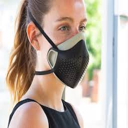

In [ ]:
X_train[0]

In [ ]:
X_train_scaled[0]

array([[[0.92156863, 0.9372549 , 0.93333333],
        [0.91764706, 0.9372549 , 0.91764706],
        [0.90980392, 0.92941176, 0.90980392],
        ...,
        [0.99607843, 0.99607843, 0.99607843],
        [0.99607843, 0.99607843, 0.99607843],
        [0.99607843, 0.99607843, 0.99607843]],

       [[0.93333333, 0.94901961, 0.94509804],
        [0.92941176, 0.94901961, 0.9372549 ],
        [0.92156863, 0.94117647, 0.92941176],
        ...,
        [0.99607843, 0.99607843, 0.99607843],
        [0.99607843, 0.99607843, 0.99607843],
        [0.99607843, 0.99607843, 0.99607843]],

       [[0.94901961, 0.96470588, 0.96078431],
        [0.94117647, 0.95686275, 0.95294118],
        [0.9372549 , 0.95294118, 0.94509804],
        ...,
        [0.99607843, 0.99607843, 0.99607843],
        [0.99607843, 0.99607843, 0.99607843],
        [0.99607843, 0.99607843, 0.99607843]],

       ...,

       [[0.94117647, 0.95294118, 0.96470588],
        [0.94509804, 0.95686275, 0.96470588],
        [0.95686275, 0

**Building a Convolutional Neural Networks (CNN)**

In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
num_of_classes = 2

model = keras.Sequential()

model.add(keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))


model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0.5))


model.add(keras.layers.Dense(num_of_classes, activation='sigmoid'))

In [ ]:
# compile the neural network
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

In [ ]:
# training the neural network
history = model.fit(X_train_scaled, Y_train, validation_split=0.1, epochs=5)

Epoch 1/5
170/170 [==============================] - 135s 787ms/step - loss: 0.4768 - acc: 0.7901 - val_loss: 0.2754 - val_acc: 0.8992
Epoch 2/5
170/170 [==============================] - 132s 777ms/step - loss: 0.3039 - acc: 0.8814 - val_loss: 0.2287 - val_acc: 0.9025
Epoch 3/5
170/170 [==============================] - 128s 755ms/step - loss: 0.2360 - acc: 0.9045 - val_loss: 0.1905 - val_acc: 0.9240
Epoch 4/5
170/170 [==============================] - 127s 748ms/step - loss: 0.2124 - acc: 0.9193 - val_loss: 0.1834 - val_acc: 0.9322
Epoch 5/5
170/170 [==============================] - 126s 744ms/step - loss: 0.1899 - acc: 0.9312 - val_loss: 0.1902 - val_acc: 0.9339


**Model Evaluation**

In [ ]:
loss, accuracy = model.evaluate(X_test_scaled, Y_test)
print('Test Accuracy =', accuracy)

48/48 [==============================] - 9s 179ms/step - loss: 0.2241 - acc: 0.9113
Test Accuracy = 0.911316990852356


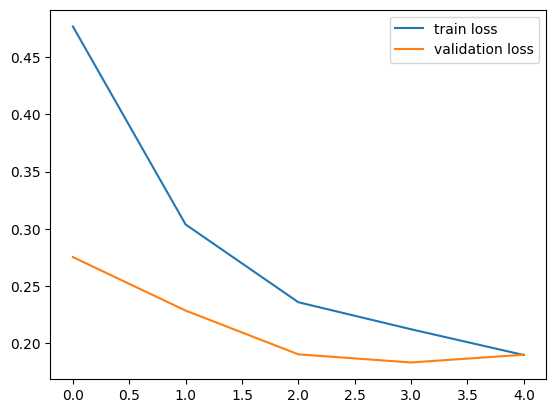

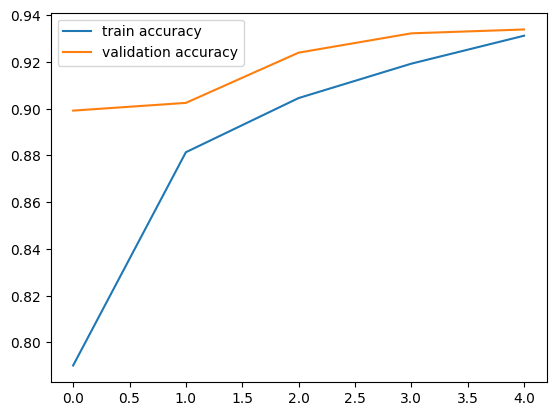

In [ ]:
h = history

# plot the loss value
plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

# plot the accuracy value
plt.plot(h.history['acc'], label='train accuracy')
plt.plot(h.history['val_acc'], label='validation accuracy')
plt.legend()
plt.show()

**Predictive System**

Path of the image to be predicted: /content/given test.1.png


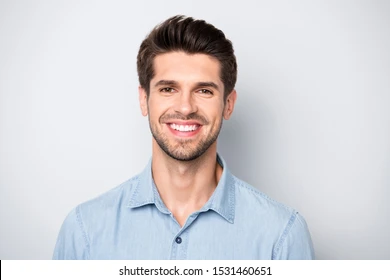

1/1 [==============================] - 0s 34ms/step
[[0.62044626 0.41827   ]]
0
The person in the image is not wearing a mask


In [ ]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)


input_pred_label = np.argmax(input_prediction)

print(input_pred_label)


if input_pred_label == 1:

  print('The person in the image is wearing a mask')

else:

  print('The person in the image is not wearing a mask')

Path of the image to be predicted: /content/test.2.jpeg


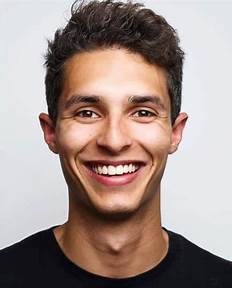

1/1 [==============================] - 0s 31ms/step
[[0.63827825 0.38728973]]
0
The person in the image is not wearing a mask


In [ ]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)


input_pred_label = np.argmax(input_prediction)

print(input_pred_label)


if input_pred_label == 1:

  print('The person in the image is wearing a mask')

else:

  print('The person in the image is not wearing a mask')